In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('max_columns', 500)

In [279]:
def print_metrics(label, pred):
    print('Accuracy: ', accuracy_score(label, pred))
    print('Precision: ', precision_score(label, pred))
    print('Recall: ', recall_score(label, pred))
    print('F1: ', f1_score(label, pred))
    print('AUC: ', roc_auc_score(label, pred))

In [280]:
df = pd.read_csv('preprocessed.csv',index_col=0)
df_base = pd.read_csv('df_base.csv',index_col=0)

In [281]:
tracker = pd.DataFrame(columns = ['train_acc','train_prec','train_rec','train_f1','train_auc','test_acc','test_prec',
                                 'test_rec','test_f1','test_auc'])

In [282]:
model_list = []

In [283]:
def update_tracker(model,name, y_train, y_hat_train, y_test, y_hat_test):
    train_acc = accuracy_score(y_train, y_hat_train)
    train_prec = precision_score(y_train, y_hat_train)
    train_rec = recall_score(y_train, y_hat_train)
    train_f1 = f1_score(y_train, y_hat_train)
    train_auc = roc_auc_score(y_train, y_hat_train)
    
    test_acc = accuracy_score(y_test, y_hat_test)
    test_prec = precision_score(y_test, y_hat_test)
    test_rec = recall_score(y_test, y_hat_test)
    test_f1 = f1_score(y_test, y_hat_test)
    test_auc = roc_auc_score(y_test, y_hat_test)
    
    model_list.append(model)
    
    tracker.loc[name] = [train_acc, train_prec, train_rec, train_f1, train_auc, test_acc, test_prec, test_rec, test_f1, test_auc]

# DF_Base - Baseline

In [284]:
y = df_base['Churn']
X = df_base.drop(['Churn'],axis=1)

In [285]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=0)

In [286]:
logreg_df_base = LogisticRegressionCV(solver='liblinear', max_iter=1000, cv=5, verbose=1, n_jobs=-1,scoring='f1')
logreg_df_base.fit(X_train, y_train)

y_hat_train = logreg_df_base.predict(X_train)
y_hat_test = logreg_df_base.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


In [287]:
update_tracker(logreg_df_base,'logreg_df_base',y_train, y_hat_train, y_test, y_hat_test)
tracker.head()

,train_acc,train_prec,train_rec,train_f1,train_auc,test_acc,test_prec,test_rec,test_f1,test_auc
logreg_df_base,0.80837,0.661889,0.562321,0.608056,0.729552,0.797274,0.65508,0.51797,0.578512,0.708908


# Baseline Logreg

In [288]:
y = df['Churn']
X = df.drop(['Churn'],axis=1)

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=0)

In [290]:
logreg_base = LogisticRegressionCV(solver='liblinear', max_iter=1000, cv=5, verbose=1, n_jobs=-1,scoring='f1')
logreg_base.fit(X_train, y_train)

y_hat_train = logreg_base.predict(X_train)
y_hat_test = logreg_base.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished


In [291]:
update_tracker(logreg_base,'logreg_base',y_train, y_hat_train, y_test, y_hat_test)
tracker.head()

,train_acc,train_prec,train_rec,train_f1,train_auc,test_acc,test_prec,test_rec,test_f1,test_auc
logreg_df_base,0.808370,0.661889,0.562321,0.608056,0.729552,0.797274,0.655080,0.517970,0.578512,0.708908
logreg_base,0.811399,0.679533,0.542264,0.603187,0.725186,0.800681,0.662234,0.526427,0.586572,0.713912


# Logreg with Class Weights

In [292]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=0)

In [293]:
logreg_weight = LogisticRegressionCV(solver='liblinear', max_iter=1000, class_weight='balanced', cv=5, verbose=1, n_jobs=-1,scoring='f1')
logreg_weight.fit(X_train, y_train)

y_hat_train = logreg_weight.predict(X_train)
y_hat_test = logreg_weight.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished


In [294]:
update_tracker(logreg_weight,'logreg_weight',y_train, y_hat_train, y_test, y_hat_test)
tracker.head()

,train_acc,train_prec,train_rec,train_f1,train_auc,test_acc,test_prec,test_rec,test_f1,test_auc
logreg_df_base,0.808370,0.661889,0.562321,0.608056,0.729552,0.797274,0.655080,0.517970,0.578512,0.708908
logreg_base,0.811399,0.679533,0.542264,0.603187,0.725186,0.800681,0.662234,0.526427,0.586572,0.713912
logreg_weight,0.759894,0.530019,0.809456,0.640590,0.775770,0.748438,0.520833,0.792812,0.628667,0.762477


# Logreg with Upsampling

In [295]:
y = df['Churn']
X = df.drop(['Churn'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=0)

In [296]:
training = pd.concat([X_train, y_train],axis=1)

In [297]:
churn = training[training['Churn']==1]
no_churn = training[training['Churn']==0]

In [298]:
from sklearn.utils import resample

In [299]:
# upsample minority
churn_upsampled = resample(churn,
                          replace=True, # sample with replacement
                          n_samples=len(no_churn), # match number in majority class
                          random_state=23) # reproducible results

In [300]:
# combine majority and upsampled minority
upsampled = pd.concat([no_churn, churn_upsampled])

In [301]:
y_train = upsampled['Churn']
X_train = upsampled.drop(['Churn'],axis=1)

In [302]:
logreg_up = LogisticRegressionCV(solver='liblinear',max_iter=1000,cv=5, verbose=1, n_jobs=-1,scoring='f1')
logreg_up.fit(X_train, y_train)

y_hat_train = logreg_up.predict(X_train)
y_hat_test = logreg_up.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


In [303]:
update_tracker(logreg_up,'logreg_up',y_train, y_hat_train, y_test, y_hat_test)
tracker.head()

,train_acc,train_prec,train_rec,train_f1,train_auc,test_acc,test_prec,test_rec,test_f1,test_auc
logreg_df_base,0.808370,0.661889,0.562321,0.608056,0.729552,0.797274,0.655080,0.517970,0.578512,0.708908
logreg_base,0.811399,0.679533,0.542264,0.603187,0.725186,0.800681,0.662234,0.526427,0.586572,0.713912
logreg_weight,0.759894,0.530019,0.809456,0.640590,0.775770,0.748438,0.520833,0.792812,0.628667,0.762477
logreg_up,0.773230,0.756215,0.806435,0.780518,0.773230,0.751278,0.524407,0.794926,0.631933,0.765087


Text(0.5, 1.0, 'Feature Importance')

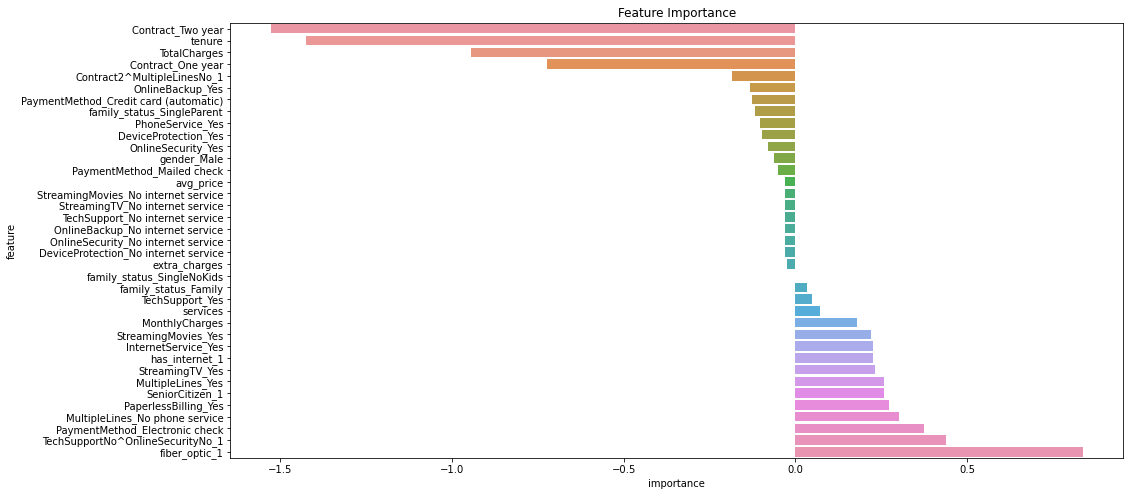

In [304]:
best_features_ranking = pd.DataFrame(list(zip(X_train,logreg_up.coef_[0])),columns=['feature','importance'])
best_features_ranking = best_features_ranking.sort_values(by='importance')
plt.figure(figsize=(16,8))
chart = sns.barplot(x='importance',y='feature',data=best_features_ranking, ci=None,orient='h')
plt.title('Feature Importance')

In [305]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

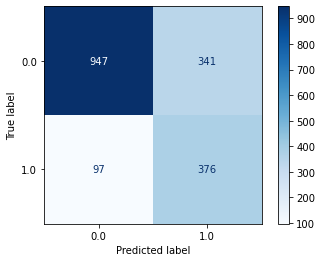

In [306]:
plot_confusion_matrix(logreg_up,X_test,y_test,cmap=plt.cm.Blues)

# Logreg with Downsampling

In [307]:
y = df['Churn']
X = df.drop(['Churn'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=0)

In [308]:
training = pd.concat([X_train, y_train],axis=1)

In [309]:
churn = training[training['Churn']==1]
no_churn = training[training['Churn']==0]

In [310]:
# downsample minority
no_churn_downsampled = resample(no_churn,
                          replace=True, # sample with replacement
                          n_samples=len(churn), # match number in majority class
                          random_state=23) # reproducible results

In [311]:
# combine minority and downsampled majority
downsampled = pd.concat([churn, no_churn_downsampled])

# checking counts
downsampled.Churn.value_counts()

0.0    1396
1.0    1396
Name: Churn, dtype: int64

In [312]:
y_train = downsampled['Churn']
X_train = downsampled.drop(['Churn'],axis=1)

In [313]:
logreg_down = LogisticRegressionCV(solver='liblinear',max_iter=1000,cv=5,verbose=1, n_jobs=-1,scoring='f1')
logreg_down.fit(X_train, y_train)

y_hat_train = logreg_down.predict(X_train)
y_hat_test = logreg_down.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


In [314]:
update_tracker(logreg_down,'logreg_down',y_train, y_hat_train, y_test, y_hat_test)
tracker.head()

,train_acc,train_prec,train_rec,train_f1,train_auc,test_acc,test_prec,test_rec,test_f1,test_auc
logreg_df_base,0.808370,0.661889,0.562321,0.608056,0.729552,0.797274,0.655080,0.517970,0.578512,0.708908
logreg_base,0.811399,0.679533,0.542264,0.603187,0.725186,0.800681,0.662234,0.526427,0.586572,0.713912
logreg_weight,0.759894,0.530019,0.809456,0.640590,0.775770,0.748438,0.520833,0.792812,0.628667,0.762477
logreg_up,0.773230,0.756215,0.806435,0.780518,0.773230,0.751278,0.524407,0.794926,0.631933,0.765087
logreg_down,0.773281,0.755869,0.807307,0.780741,0.773281,0.742192,0.513032,0.790698,0.622296,0.757538


# Logreg with SMOTE

In [315]:
from imblearn.over_sampling import SMOTE

In [316]:
y = df['Churn']
X = df.drop(['Churn'],axis=1)

In [317]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)

In [318]:
sm = SMOTE(random_state=23)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [319]:
logreg_smote = LogisticRegressionCV(solver='liblinear',max_iter=1000,cv=5, verbose=1, n_jobs=-1,scoring='f1')
logreg_smote.fit(X_train, y_train)

y_hat_train = logreg_smote.predict(X_train)
y_hat_test = logreg_smote.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


In [320]:
update_tracker(logreg_smote,'logreg_smote',y_train, y_hat_train, y_test, y_hat_test)
tracker.head()

,train_acc,train_prec,train_rec,train_f1,train_auc,test_acc,test_prec,test_rec,test_f1,test_auc
logreg_df_base,0.808370,0.661889,0.562321,0.608056,0.729552,0.797274,0.655080,0.517970,0.578512,0.708908
logreg_base,0.811399,0.679533,0.542264,0.603187,0.725186,0.800681,0.662234,0.526427,0.586572,0.713912
logreg_weight,0.759894,0.530019,0.809456,0.640590,0.775770,0.748438,0.520833,0.792812,0.628667,0.762477
logreg_up,0.773230,0.756215,0.806435,0.780518,0.773230,0.751278,0.524407,0.794926,0.631933,0.765087
logreg_down,0.773281,0.755869,0.807307,0.780741,0.773281,0.742192,0.513032,0.790698,0.622296,0.757538


Text(0.5, 1.0, 'Feature Importance')

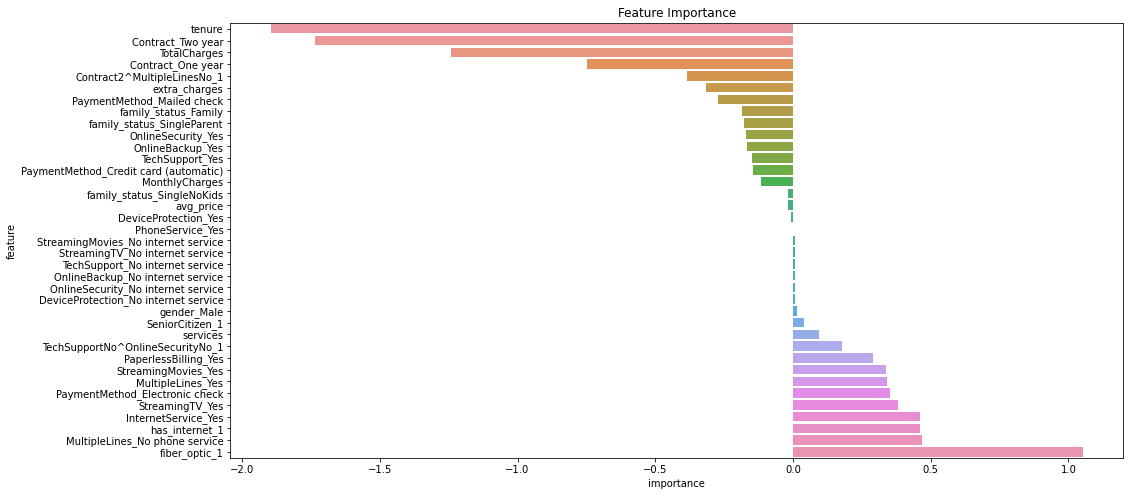

In [321]:
best_features_ranking = pd.DataFrame(list(zip(X_train,logreg_smote.coef_[0])),columns=['feature','importance'])
best_features_ranking = best_features_ranking.sort_values(by='importance')
plt.figure(figsize=(16,8))
chart = sns.barplot(x='importance',y='feature',data=best_features_ranking, ci=None,orient='h')
plt.title('Feature Importance')

# Logreg with TOPEK

In [322]:
from collections import Counter
from imblearn.under_sampling import TomekLinks # doctest: +NORMALIZE_WHITESPACE

In [323]:
y = df['Churn']
X = df.drop(['Churn'],axis=1)

In [324]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)

In [325]:
tl = TomekLinks()
X_train, y_train = tl.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train))

Resampled dataset shape Counter({0.0: 3504, 1.0: 1405})


In [326]:
logreg_tomek = LogisticRegressionCV(solver='liblinear',max_iter=1000,cv=5, verbose=1, n_jobs=-1,scoring='f1')
logreg_tomek.fit(X_train, y_train)

y_hat_train = logreg_tomek.predict(X_train)
y_hat_test = logreg_tomek.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished


In [327]:
update_tracker(logreg_tomek,'logreg_tomek',y_train, y_hat_train, y_test, y_hat_test)
tracker.head(10)

,train_acc,train_prec,train_rec,train_f1,train_auc,test_acc,test_prec,test_rec,test_f1,test_auc
logreg_df_base,0.808370,0.661889,0.562321,0.608056,0.729552,0.797274,0.655080,0.517970,0.578512,0.708908
logreg_base,0.811399,0.679533,0.542264,0.603187,0.725186,0.800681,0.662234,0.526427,0.586572,0.713912
logreg_weight,0.759894,0.530019,0.809456,0.640590,0.775770,0.748438,0.520833,0.792812,0.628667,0.762477
logreg_up,0.773230,0.756215,0.806435,0.780518,0.773230,0.751278,0.524407,0.794926,0.631933,0.765087
logreg_down,0.773281,0.755869,0.807307,0.780741,0.773281,0.742192,0.513032,0.790698,0.622296,0.757538
logreg_smote,0.780960,0.758547,0.824303,0.790059,0.780960,0.752413,0.519391,0.808190,0.632378,0.770325
logreg_tomek,0.820941,0.714169,0.624199,0.666160,0.762014,0.797274,0.612159,0.629310,0.620616,0.743337


# Logreg Base, lasso

In [328]:
y = df['Churn']
X = df.drop(['Churn'],axis=1)

In [329]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=0)

In [330]:
logreg_base_lasso = LogisticRegressionCV(solver='liblinear', penalty='l1', max_iter=1000, cv=5, verbose=1, n_jobs=-1,scoring='f1')
logreg_base_lasso.fit(X_train, y_train)

y_hat_train = logreg_base_lasso.predict(X_train)
y_hat_test = logreg_base_lasso.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.4s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished


In [331]:
update_tracker(logreg_base_lasso,'logreg_base_lasso',y_train, y_hat_train, y_test, y_hat_test)
tracker.head(10)

,train_acc,train_prec,train_rec,train_f1,train_auc,test_acc,test_prec,test_rec,test_f1,test_auc
logreg_df_base,0.808370,0.661889,0.562321,0.608056,0.729552,0.797274,0.655080,0.517970,0.578512,0.708908
logreg_base,0.811399,0.679533,0.542264,0.603187,0.725186,0.800681,0.662234,0.526427,0.586572,0.713912
logreg_weight,0.759894,0.530019,0.809456,0.640590,0.775770,0.748438,0.520833,0.792812,0.628667,0.762477
logreg_up,0.773230,0.756215,0.806435,0.780518,0.773230,0.751278,0.524407,0.794926,0.631933,0.765087
logreg_down,0.773281,0.755869,0.807307,0.780741,0.773281,0.742192,0.513032,0.790698,0.622296,0.757538
logreg_smote,0.780960,0.758547,0.824303,0.790059,0.780960,0.752413,0.519391,0.808190,0.632378,0.770325
logreg_tomek,0.820941,0.714169,0.624199,0.666160,0.762014,0.797274,0.612159,0.629310,0.620616,0.743337
logreg_base_lasso,0.811210,0.678924,0.542264,0.602947,0.725057,0.801249,0.663130,0.528541,0.588235,0.714969


# Logreg Class Weight, lasso

In [332]:
y = df['Churn']
X = df.drop(['Churn'],axis=1)

In [333]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=0)

In [334]:
logreg_weight_lasso = LogisticRegressionCV(solver='liblinear', penalty='l1', class_weight='balanced', max_iter=1000, cv=5, verbose=1, n_jobs=-1,scoring='f1')
logreg_weight_lasso.fit(X_train, y_train)

y_hat_train = logreg_weight_lasso.predict(X_train)
y_hat_test = logreg_weight_lasso.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.9s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.4s finished


In [335]:
update_tracker(logreg_weight_lasso,'logreg_weight_lasso',y_train, y_hat_train, y_test, y_hat_test)
tracker.head(10)

,train_acc,train_prec,train_rec,train_f1,train_auc,test_acc,test_prec,test_rec,test_f1,test_auc
logreg_df_base,0.808370,0.661889,0.562321,0.608056,0.729552,0.797274,0.655080,0.517970,0.578512,0.708908
logreg_base,0.811399,0.679533,0.542264,0.603187,0.725186,0.800681,0.662234,0.526427,0.586572,0.713912
logreg_weight,0.759894,0.530019,0.809456,0.640590,0.775770,0.748438,0.520833,0.792812,0.628667,0.762477
logreg_up,0.773230,0.756215,0.806435,0.780518,0.773230,0.751278,0.524407,0.794926,0.631933,0.765087
logreg_down,0.773281,0.755869,0.807307,0.780741,0.773281,0.742192,0.513032,0.790698,0.622296,0.757538
logreg_smote,0.780960,0.758547,0.824303,0.790059,0.780960,0.752413,0.519391,0.808190,0.632378,0.770325
logreg_tomek,0.820941,0.714169,0.624199,0.666160,0.762014,0.797274,0.612159,0.629310,0.620616,0.743337
logreg_base_lasso,0.811210,0.678924,0.542264,0.602947,0.725057,0.801249,0.663130,0.528541,0.588235,0.714969
logreg_weight_lasso,0.759137,0.529081,0.808023,0.639456,0.774797,0.747303,0.519553,0.786469,0.625736,0.759694


# Logreg Upsampled, Lasso

In [336]:
y = df['Churn']
X = df.drop(['Churn'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=0)

In [337]:
training = pd.concat([X_train, y_train],axis=1)

In [338]:
churn = training[training['Churn']==1]
no_churn = training[training['Churn']==0]

In [339]:
# upsample minority
churn_upsampled = resample(churn,
                          replace=True, # sample with replacement
                          n_samples=len(no_churn), # match number in majority class
                          random_state=23) # reproducible results

In [340]:
# combine majority and upsampled minority
upsampled = pd.concat([no_churn, churn_upsampled])

In [341]:
y_train = upsampled['Churn']
X_train = upsampled.drop(['Churn'],axis=1)

In [342]:
logreg_up_lasso = LogisticRegressionCV(solver='liblinear',penalty='l1',max_iter=1000,cv=5, verbose=1, n_jobs=-1,scoring='f1')
logreg_up_lasso.fit(X_train, y_train)

y_hat_train = logreg_up_lasso.predict(X_train)
y_hat_test = logreg_up_lasso.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.1s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.0s finished


In [343]:
update_tracker(logreg_up_lasso,'logreg_up_lasso',y_train, y_hat_train, y_test, y_hat_test)
tracker.head(10)

,train_acc,train_prec,train_rec,train_f1,train_auc,test_acc,test_prec,test_rec,test_f1,test_auc
logreg_df_base,0.808370,0.661889,0.562321,0.608056,0.729552,0.797274,0.655080,0.517970,0.578512,0.708908
logreg_base,0.811399,0.679533,0.542264,0.603187,0.725186,0.800681,0.662234,0.526427,0.586572,0.713912
logreg_weight,0.759894,0.530019,0.809456,0.640590,0.775770,0.748438,0.520833,0.792812,0.628667,0.762477
logreg_up,0.773230,0.756215,0.806435,0.780518,0.773230,0.751278,0.524407,0.794926,0.631933,0.765087
logreg_down,0.773281,0.755869,0.807307,0.780741,0.773281,0.742192,0.513032,0.790698,0.622296,0.757538
logreg_smote,0.780960,0.758547,0.824303,0.790059,0.780960,0.752413,0.519391,0.808190,0.632378,0.770325
logreg_tomek,0.820941,0.714169,0.624199,0.666160,0.762014,0.797274,0.612159,0.629310,0.620616,0.743337
logreg_base_lasso,0.811210,0.678924,0.542264,0.602947,0.725057,0.801249,0.663130,0.528541,0.588235,0.714969
logreg_weight_lasso,0.759137,0.529081,0.808023,0.639456,0.774797,0.747303,0.519553,0.786469,0.625736,0.759694
logreg_up_lasso,0.772844,0.755915,0.805920,0.780117,0.772844,0.746735,0.518776,0.788584,0.625839,0.759975


# Logreg Down, Lasso

In [344]:
y = df['Churn']
X = df.drop(['Churn'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=0)

In [345]:
training = pd.concat([X_train, y_train],axis=1)

In [346]:
churn = training[training['Churn']==1]
no_churn = training[training['Churn']==0]

In [347]:
# upsample minority
no_churn_downsampled = resample(no_churn,
                          replace=True, # sample with replacement
                          n_samples=len(churn), # match number in minority class
                          random_state=23) # reproducible results

In [348]:
# combine minority and downsampled majority
downsampled = pd.concat([churn, no_churn_downsampled])

In [349]:
y_train = downsampled['Churn']
X_train = downsampled.drop(['Churn'],axis=1)

In [350]:
logreg_down_lasso = LogisticRegressionCV(solver='liblinear',penalty='l1',max_iter=1000,cv=5, verbose=1, n_jobs=-1,scoring='f1')
logreg_down_lasso.fit(X_train, y_train)

y_hat_train = logreg_down_lasso.predict(X_train)
y_hat_test = logreg_down_lasso.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.5s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.8s finished


In [351]:
update_tracker(logreg_down_lasso,'logreg_down_lasso',y_train, y_hat_train, y_test, y_hat_test)
tracker.head(10)

,train_acc,train_prec,train_rec,train_f1,train_auc,test_acc,test_prec,test_rec,test_f1,test_auc
logreg_df_base,0.808370,0.661889,0.562321,0.608056,0.729552,0.797274,0.655080,0.517970,0.578512,0.708908
logreg_base,0.811399,0.679533,0.542264,0.603187,0.725186,0.800681,0.662234,0.526427,0.586572,0.713912
logreg_weight,0.759894,0.530019,0.809456,0.640590,0.775770,0.748438,0.520833,0.792812,0.628667,0.762477
logreg_up,0.773230,0.756215,0.806435,0.780518,0.773230,0.751278,0.524407,0.794926,0.631933,0.765087
logreg_down,0.773281,0.755869,0.807307,0.780741,0.773281,0.742192,0.513032,0.790698,0.622296,0.757538
logreg_smote,0.780960,0.758547,0.824303,0.790059,0.780960,0.752413,0.519391,0.808190,0.632378,0.770325
logreg_tomek,0.820941,0.714169,0.624199,0.666160,0.762014,0.797274,0.612159,0.629310,0.620616,0.743337
logreg_base_lasso,0.811210,0.678924,0.542264,0.602947,0.725057,0.801249,0.663130,0.528541,0.588235,0.714969
logreg_weight_lasso,0.759137,0.529081,0.808023,0.639456,0.774797,0.747303,0.519553,0.786469,0.625736,0.759694
logreg_up_lasso,0.772844,0.755915,0.805920,0.780117,0.772844,0.746735,0.518776,0.788584,0.625839,0.759975


# Logreg SMOTE, lasso

In [352]:
y = df['Churn']
X = df.drop(['Churn'],axis=1)

In [353]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)

In [354]:
sm = SMOTE(random_state=23)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [355]:
logreg_smote_lasso = LogisticRegressionCV(solver='liblinear',penalty='l1',max_iter=1000,cv=5, verbose=1, n_jobs=-1,scoring='f1')
logreg_smote_lasso.fit(X_train, y_train)

y_hat_train = logreg_smote_lasso.predict(X_train)
y_hat_test = logreg_smote_lasso.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.3s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.7s finished


In [356]:
update_tracker(logreg_smote_lasso,'logreg_smote_lasso',y_train, y_hat_train, y_test, y_hat_test)
tracker.head(20)

,train_acc,train_prec,train_rec,train_f1,train_auc,test_acc,test_prec,test_rec,test_f1,test_auc
logreg_df_base,0.808370,0.661889,0.562321,0.608056,0.729552,0.797274,0.655080,0.517970,0.578512,0.708908
logreg_base,0.811399,0.679533,0.542264,0.603187,0.725186,0.800681,0.662234,0.526427,0.586572,0.713912
logreg_weight,0.759894,0.530019,0.809456,0.640590,0.775770,0.748438,0.520833,0.792812,0.628667,0.762477
logreg_up,0.773230,0.756215,0.806435,0.780518,0.773230,0.751278,0.524407,0.794926,0.631933,0.765087
logreg_down,0.773281,0.755869,0.807307,0.780741,0.773281,0.742192,0.513032,0.790698,0.622296,0.757538
logreg_smote,0.780960,0.758547,0.824303,0.790059,0.780960,0.752413,0.519391,0.808190,0.632378,0.770325
logreg_tomek,0.820941,0.714169,0.624199,0.666160,0.762014,0.797274,0.612159,0.629310,0.620616,0.743337
logreg_base_lasso,0.811210,0.678924,0.542264,0.602947,0.725057,0.801249,0.663130,0.528541,0.588235,0.714969
logreg_weight_lasso,0.759137,0.529081,0.808023,0.639456,0.774797,0.747303,0.519553,0.786469,0.625736,0.759694
logreg_up_lasso,0.772844,0.755915,0.805920,0.780117,0.772844,0.746735,0.518776,0.788584,0.625839,0.759975


# Logreg TOMEK, lasso

In [357]:
y = df['Churn']
X = df.drop(['Churn'],axis=1)

In [358]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)

In [359]:
tl = TomekLinks()
X_train, y_train = tl.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train))

Resampled dataset shape Counter({0.0: 3504, 1.0: 1405})


In [360]:
logreg_tomek_lasso = LogisticRegressionCV(solver='liblinear',penalty='l1',max_iter=1000,cv=5, verbose=1, n_jobs=-1,scoring='f1')
logreg_tomek_lasso.fit(X_train, y_train)

y_hat_train = logreg_tomek_lasso.predict(X_train)
y_hat_test = logreg_tomek_lasso.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.5s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.3s finished


In [361]:
update_tracker(logreg_tomek_lasso,'logreg_tomek_lasso',y_train, y_hat_train, y_test, y_hat_test)
tracker.head(20)

,train_acc,train_prec,train_rec,train_f1,train_auc,test_acc,test_prec,test_rec,test_f1,test_auc
logreg_df_base,0.808370,0.661889,0.562321,0.608056,0.729552,0.797274,0.655080,0.517970,0.578512,0.708908
logreg_base,0.811399,0.679533,0.542264,0.603187,0.725186,0.800681,0.662234,0.526427,0.586572,0.713912
logreg_weight,0.759894,0.530019,0.809456,0.640590,0.775770,0.748438,0.520833,0.792812,0.628667,0.762477
logreg_up,0.773230,0.756215,0.806435,0.780518,0.773230,0.751278,0.524407,0.794926,0.631933,0.765087
logreg_down,0.773281,0.755869,0.807307,0.780741,0.773281,0.742192,0.513032,0.790698,0.622296,0.757538
logreg_smote,0.780960,0.758547,0.824303,0.790059,0.780960,0.752413,0.519391,0.808190,0.632378,0.770325
logreg_tomek,0.820941,0.714169,0.624199,0.666160,0.762014,0.797274,0.612159,0.629310,0.620616,0.743337
logreg_base_lasso,0.811210,0.678924,0.542264,0.602947,0.725057,0.801249,0.663130,0.528541,0.588235,0.714969
logreg_weight_lasso,0.759137,0.529081,0.808023,0.639456,0.774797,0.747303,0.519553,0.786469,0.625736,0.759694
logreg_up_lasso,0.772844,0.755915,0.805920,0.780117,0.772844,0.746735,0.518776,0.788584,0.625839,0.759975


# Run Model on best features

In [362]:
def get_best_features(model, features_df):
    coef_df = pd.DataFrame(list(zip(features_df.columns, model.coef_[0])),columns = ['feature','coef_val'])
#     coef_df = coef_df.sort_values(by='coef_val')
#     low_5 = list(coef_df.head(5)['feature'])
#     top_5 = list(coef_df.tail(5)['feature'])
    
    return coef_df

In [363]:
holder = pd.DataFrame(columns = ['feature','coef_val'])

for model in model_list:
    coef_df = get_best_features(model, X)
    holder = pd.concat([holder,coef_df])

In [364]:
holder = holder.groupby(['feature'])['coef_val'].mean().reset_index().sort_values(by='coef_val')

In [365]:
best_features = list(holder[abs(holder['coef_val']) > .15]['feature'])

In [366]:
best_features.append('Churn')

In [367]:
df1 = df[best_features].copy()

In [368]:
y = df1['Churn']
X = df1.drop(['Churn'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=0)

In [369]:
training = pd.concat([X_train, y_train],axis=1)

In [370]:
churn = training[training['Churn']==1]
no_churn = training[training['Churn']==0]

In [371]:
# upsample minority
churn_upsampled = resample(churn,
                          replace=True, # sample with replacement
                          n_samples=len(no_churn), # match number in majority class
                          random_state=23) # reproducible results

In [372]:
# combine majority and upsampled minority
upsampled = pd.concat([no_churn, churn_upsampled])

In [373]:
y_train = upsampled['Churn']
X_train = upsampled.drop(['Churn'],axis=1)

In [374]:
logreg_up_lasso_imp = LogisticRegressionCV(solver='liblinear',penalty='l1',max_iter=1000,cv=5, verbose=1, n_jobs=-1,scoring='f1')
logreg_up_lasso_imp.fit(X_train, y_train)

y_hat_train = logreg_up_lasso_imp.predict(X_train)
y_hat_test = logreg_up_lasso_imp.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.2s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.9s finished


In [375]:
update_tracker(logreg_up_lasso_imp,'logreg_up_lasso_imp',y_train, y_hat_train, y_test, y_hat_test)
tracker.head(20)

,train_acc,train_prec,train_rec,train_f1,train_auc,test_acc,test_prec,test_rec,test_f1,test_auc
logreg_df_base,0.808370,0.661889,0.562321,0.608056,0.729552,0.797274,0.655080,0.517970,0.578512,0.708908
logreg_base,0.811399,0.679533,0.542264,0.603187,0.725186,0.800681,0.662234,0.526427,0.586572,0.713912
logreg_weight,0.759894,0.530019,0.809456,0.640590,0.775770,0.748438,0.520833,0.792812,0.628667,0.762477
logreg_up,0.773230,0.756215,0.806435,0.780518,0.773230,0.751278,0.524407,0.794926,0.631933,0.765087
logreg_down,0.773281,0.755869,0.807307,0.780741,0.773281,0.742192,0.513032,0.790698,0.622296,0.757538
logreg_smote,0.780960,0.758547,0.824303,0.790059,0.780960,0.752413,0.519391,0.808190,0.632378,0.770325
logreg_tomek,0.820941,0.714169,0.624199,0.666160,0.762014,0.797274,0.612159,0.629310,0.620616,0.743337
logreg_base_lasso,0.811210,0.678924,0.542264,0.602947,0.725057,0.801249,0.663130,0.528541,0.588235,0.714969
logreg_weight_lasso,0.759137,0.529081,0.808023,0.639456,0.774797,0.747303,0.519553,0.786469,0.625736,0.759694
logreg_up_lasso,0.772844,0.755915,0.805920,0.780117,0.772844,0.746735,0.518776,0.788584,0.625839,0.759975


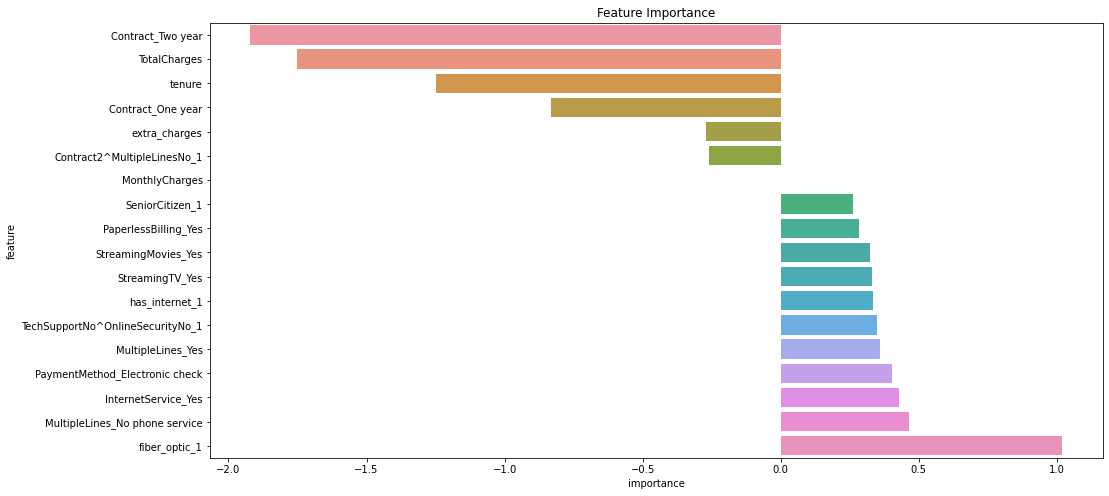

In [381]:
best_features_ranking = pd.DataFrame(list(zip(X_train,logreg_up_lasso_imp.coef_[0])),columns=['feature','importance'])
best_features_ranking = best_features_ranking.sort_values(by='importance')
plt.figure(figsize=(16,8))
chart = sns.barplot(x='importance',y='feature',data=best_features_ranking, ci=None,orient='h')
plt.title('Feature Importance')
plt.show();

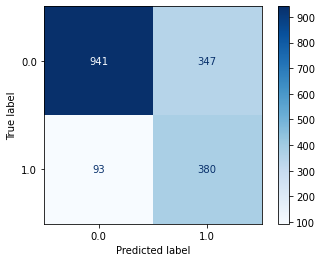

In [378]:
plot_confusion_matrix(logreg_up_lasso_imp,X_test,y_test,cmap=plt.cm.Blues)

# Best AVG Features, Weight

In [97]:
df1 = df[best_features].copy()

In [98]:
y = df1['Churn']
X = df1.drop(['Churn'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=0)

In [99]:
logreg_weight_ridge_imp = LogisticRegressionCV(solver='liblinear',penalty='l2',max_iter=1000,cv=5, verbose=1, n_jobs=-1,scoring='f1',class_weight='balanced')
logreg_weight_ridge_imp.fit(X_train, y_train)

y_hat_train = logreg_weight_ridge_imp.predict(X_train)
y_hat_test = logreg_weight_ridge_imp.predict(X_test)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


In [100]:
update_tracker(logreg_weight_ridge_imp,'logreg_weight_ridge_imp',y_train, y_hat_train, y_test, y_hat_test)
tracker.head(20)

,train_acc,train_prec,train_rec,train_f1,train_auc,test_acc,test_prec,test_rec,test_f1,test_auc
logreg_df_base,0.808180,0.661331,0.562321,0.607820,0.729423,0.794435,0.648000,0.513742,0.573113,0.705629
logreg_base,0.811399,0.679533,0.542264,0.603187,0.725186,0.800681,0.662234,0.526427,0.586572,0.713912
logreg_weight,0.760083,0.530267,0.809456,0.640771,0.775899,0.748438,0.520833,0.792812,0.628667,0.762477
logreg_up,0.772587,0.756292,0.804376,0.779593,0.772587,0.752981,0.526611,0.794926,0.633530,0.766252
logreg_down,0.774355,0.757047,0.808023,0.781705,0.774355,0.741056,0.511628,0.790698,0.621262,0.756762
logreg_smote,0.780444,0.758195,0.823529,0.789513,0.780444,0.752413,0.519391,0.808190,0.632378,0.770325
logreg_tomek,0.820941,0.714169,0.624199,0.666160,0.762014,0.796706,0.611345,0.627155,0.619149,0.742259
logreg_base_lasso,0.811399,0.679533,0.542264,0.603187,0.725186,0.801249,0.663130,0.528541,0.588235,0.714969
logreg_weight_lasso,0.759137,0.529081,0.808023,0.639456,0.774797,0.747303,0.519553,0.786469,0.625736,0.759694
logreg_up_lasso,0.772844,0.755915,0.805920,0.780117,0.772844,0.746735,0.518776,0.788584,0.625839,0.759975


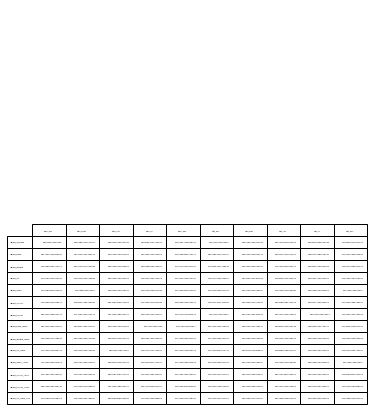

In [383]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import table 

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, tracker)  # where df is your data frame

In [101]:
logreg_results = tracker[['train_f1','test_f1']]

In [102]:
logreg_results.to_csv('logreg_results.csv')

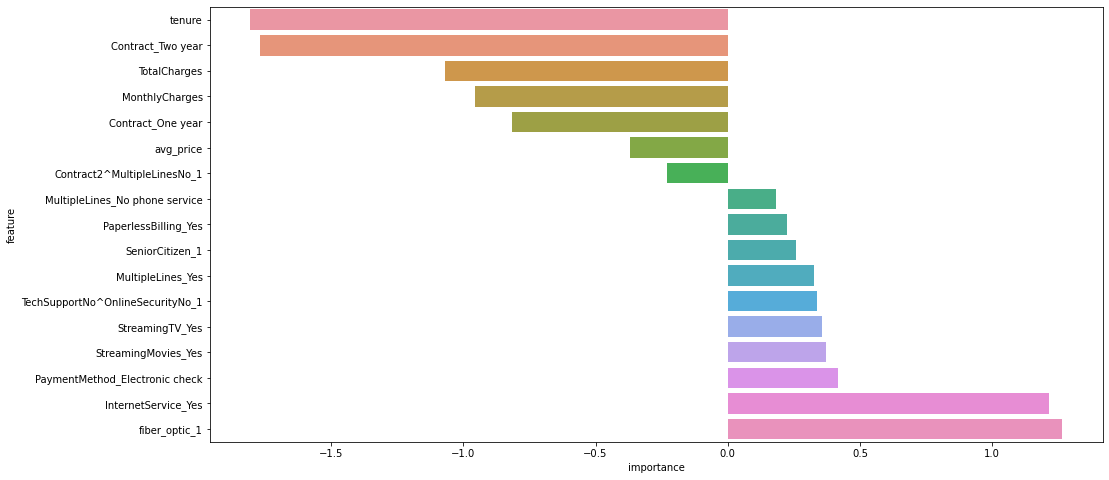

In [103]:
best_features_ranking = pd.DataFrame(list(zip(X_train,logreg_weight_ridge_imp.coef_[0])),columns=['feature','importance'])
best_features_ranking = best_features_ranking.sort_values(by='importance')
plt.figure(figsize=(16,8))
chart = sns.barplot(x='importance',y='feature',data=best_features_ranking, ci=None,orient='h')

# Poly2, weight, lasso, RFE

In [104]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [105]:
df1 = df[best_features].copy()

In [106]:
y = df1['Churn']
X = df1.drop(['Churn'],axis=1)

In [107]:
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only = False)
poly_data = poly.fit_transform(X)
poly_columns = poly.get_feature_names(X.columns)
X_poly = pd.DataFrame(poly_data, columns=poly_columns)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X_poly,y,test_size=.25, random_state=0)

In [109]:
num_features = 100
model = LogisticRegressionCV(solver='liblinear',max_iter=1000, cv=10, class_weight='balanced',scoring='f1', n_jobs=-1)
rfe_stand = RFE(model, n_features_to_select=num_features,verbose=1,)
fit_stand = rfe_stand.fit(X_train, y_train)

print("Std Model Feature Ranking:", fit_stand.ranking_)

score_stand = rfe_stand.score(X_train,y_train,)
print("Standardized Model Score with selected features is: %f (%f)" % (score_stand.mean(), score_stand.std()))

Fitting estimator with 170 features.
Fitting estimator with 169 features.
Fitting estimator with 168 features.
Fitting estimator with 167 features.
Fitting estimator with 166 features.
Fitting estimator with 165 features.
Fitting estimator with 164 features.
Fitting estimator with 163 features.
Fitting estimator with 162 features.
Fitting estimator with 161 features.
Fitting estimator with 160 features.
Fitting estimator with 159 features.
Fitting estimator with 158 features.
Fitting estimator with 157 features.
Fitting estimator with 156 features.
Fitting estimator with 155 features.
Fitting estimator with 154 features.
Fitting estimator with 153 features.
Fitting estimator with 152 features.
Fitting estimator with 151 features.
Fitting estimator with 150 features.
Fitting estimator with 149 features.
Fitting estimator with 148 features.


KeyboardInterrupt: 

In [ ]:
feature_names = np.array(X_poly.columns)

In [ ]:
X_imp = X_poly[feature_names[rfe_stand.support_]]
y = y

X_train, X_test, y_train, y_test = train_test_split(X_imp,y,test_size=.25, random_state=0)

In [ ]:
logreg_weight_poly2 = LogisticRegressionCV(solver='liblinear',class_weight='balanced',max_iter=1000,cv=5, verbose=1, n_jobs=-1)
logreg_weight_poly2.fit(X_train, y_train)

y_hat_train = logreg_weight_poly2.predict(X_train)
y_hat_test = logreg_weight_poly2.predict(X_test)

In [ ]:
update_tracker(logreg_weight_poly2,'logreg_weight_poly2_imp',y_train, y_hat_train, y_test, y_hat_test)
tracker.head(20)

In [ ]:
coef_df = get_best_features(logreg_weight_poly2, X_train).sort_values(by='coef_val')

In [ ]:
coef_df

# VIF Analysis

In [ ]:
y = df['Churn']
X = df.drop(['Churn'],axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

viffactor = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif = pd.DataFrame()
vif["VIF Factor"] = viffactor
#[variance_inflation_factor(df_features.values, i) for i in range(df_features.shape[1])]
vif["features"] = X.columns
vif = vif.round(1).sort_values("VIF Factor",ascending=True)
worst_features = vif[vif['VIF Factor']>20]['features']

In [ ]:
X = X.drop(worst_features,axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25, random_state=0)

In [ ]:
logreg_vif = LogisticRegressionCV(solver='liblinear',max_iter=1000, cv=10, class_weight='balanced',scoring='f1')

logreg_vif.fit(X_train, y_train)

y_hat_train = logreg_vif.predict(X_train)
y_hat_test = logreg_vif.predict(X_test)

In [ ]:
update_tracker(logreg_vif,'logreg_vif',y_train, y_hat_train, y_test, y_hat_test)
tracker.head(20)

# VIF on Poly2

In [ ]:
y = df1['Churn']
X = df1.drop(['Churn'],axis=1)

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only = False)
poly_data = poly.fit_transform(X)
poly_columns = poly.get_feature_names(X.columns)
X_poly = pd.DataFrame(poly_data, columns=poly_columns)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

viffactor = [variance_inflation_factor(X_poly.values, i) for i in range(X_poly.shape[1])]

vif = pd.DataFrame()
vif["VIF Factor"] = viffactor
#[variance_inflation_factor(df_features.values, i) for i in range(df_features.shape[1])]
vif["features"] = X_poly.columns
vif = vif.round(1).sort_values("VIF Factor",ascending=True)
worst_features = vif[vif['VIF Factor']>20]['features']

In [ ]:
X_poly = X_poly.drop(worst_features,axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_poly,y,test_size=.25, random_state=0)

In [ ]:
logreg_poly_vif = LogisticRegressionCV(solver='liblinear',max_iter=1000, cv=10, class_weight='balanced',scoring='f1')

logreg_poly_vif.fit(X_train, y_train)

y_hat_train = logreg_poly_vif.predict(X_train)
y_hat_test = logreg_poly_vif.predict(X_test)

In [ ]:
update_tracker(logreg_poly_vif,'logreg_poly_vif',y_train, y_hat_train, y_test, y_hat_test)
tracker.head(20)

In [ ]:
get_best_features(logreg_poly_vif, X_poly).sort_values(by='coef_val')